In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import acquire


In [2]:
# acquiring the data using the get_telco_data function from acquire module

df = acquire.get_telco_data()

In [3]:
# creating a dataframe of customers with only 2 year contract type

df = df[df.contract_type == 'Two year']

In [4]:
# reducing the dataframe to the only columns we need

df = df[['customer_id', 'monthly_charges', 'tenure', 'total_charges']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 1793 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 66.2+ KB


In [6]:
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


**Takeaways:**
- Min 0 for tenure, check total charges
- total charge is non numeric convert into numeric type
    

In [7]:
## changing data types for total_charges

df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')

In [8]:
# checking for null values
df.isna().sum()

customer_id         0
monthly_charges     0
tenure              0
total_charges      10
dtype: int64

In [9]:
# dropping na's

df = df.dropna()

In [10]:
df

,customer_id,monthly_charges,tenure,total_charges
1793,0016-QLJIS,90.45,65,5957.90
1794,0017-DINOC,45.20,54,2460.55
1795,0019-GFNTW,45.05,56,2560.10
1796,0056-EPFBG,39.40,20,825.40
1797,0078-XZMHT,85.15,72,6316.20
...,...,...,...,...
7038,9950-MTGYX,20.30,28,487.95
7039,9953-ZMKSM,25.25,63,1559.30
7040,9964-WBQDJ,24.40,71,1725.40
7041,9972-EWRJS,19.25,67,1372.90


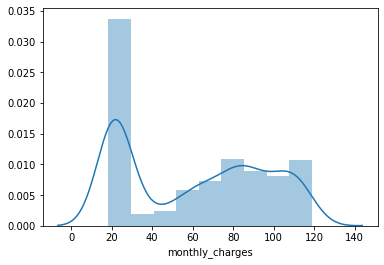

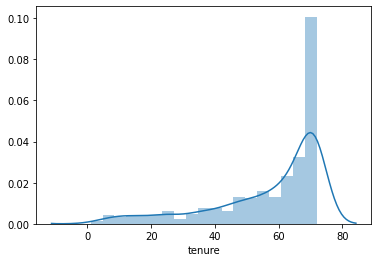

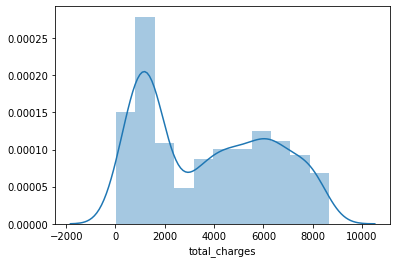

In [11]:
for col in ['monthly_charges', 'tenure', 'total_charges']:
    sns.distplot(df[col])
    plt.show()

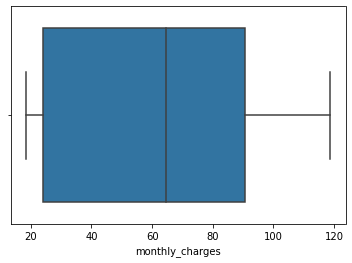

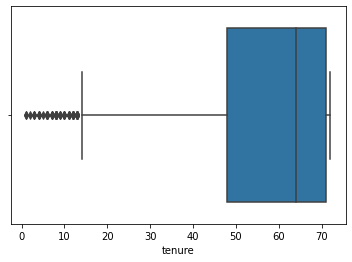

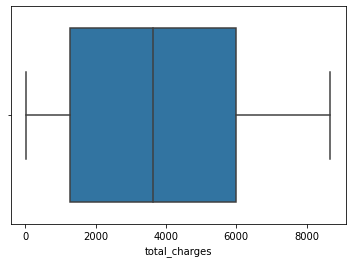

In [12]:
for col in ['monthly_charges', 'tenure', 'total_charges']:
    sns.boxplot(df[col])
    plt.show()

# sns.boxplot(df.monthly_charges)

In [16]:
df['monthly_charges_cat'] = pd.cut(df.monthly_charges, bins = 21)

In [17]:
df

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_cat
1793,0016-QLJIS,90.45,65,5957.90,"(90.079, 94.857]"
1794,0017-DINOC,45.20,54,2460.55,"(42.293, 47.071]"
1795,0019-GFNTW,45.05,56,2560.10,"(42.293, 47.071]"
1796,0056-EPFBG,39.40,20,825.40,"(37.514, 42.293]"
1797,0078-XZMHT,85.15,72,6316.20,"(80.521, 85.3]"
...,...,...,...,...,...
7038,9950-MTGYX,20.30,28,487.95,"(18.3, 23.179]"
7039,9953-ZMKSM,25.25,63,1559.30,"(23.179, 27.957]"
7040,9964-WBQDJ,24.40,71,1725.40,"(23.179, 27.957]"
7041,9972-EWRJS,19.25,67,1372.90,"(18.3, 23.179]"


In [18]:
def wrangle_telco(df):
    df = df[df.contract_type == 'Two year']
    df = df[['customer_id', 'monthly_charges', 'tenure', 'total_charges']]
    df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')
    df = df.dropna()
    df['monthly_charges_cat'] = pd.cut(df.monthly_charges, bins = 21)
    return df
    